# Module 4 Part 1.1 - Machine Learning Prediction Lab 

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score, mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score,mean_absolute_error,r2_score,f1_score
import sklearn.metrics as metrics
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl 

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.style.use('fivethirtyeight')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)

#### This function is to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

#### Data Sources

In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)
X = X.values


#### **TASK 1:** Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [4]:
Y = data['Class'].to_numpy()

#### **TASK 2:** Standardize the data in X then reassign it to the variable X using the transform provided below.

In [5]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

#### We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

#### **TASK 3:** Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels: X_train, X_test, Y_train, Y_test.

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

#### **TASK 4:** Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [7]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

#### Logisitc Regression Object

In [8]:
lr = LogisticRegression()


#### GridSearchCV object

In [9]:
logreg_cv = GridSearchCV(estimator=lr,param_grid=parameters,cv=10)

#### Train The Data

In [10]:
logreg_cv.fit(X_train,Y_train)
print("Tuned hpyerparameters:(best parameters) ",logreg_cv.best_params_)
print("Accuracy:",logreg_cv.best_score_) 

Tuned hpyerparameters:(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


#### **Task 5:** Calculate the accuracy on the test data using the method score.

Test Data Accuracy Score: 0.8333333333333334


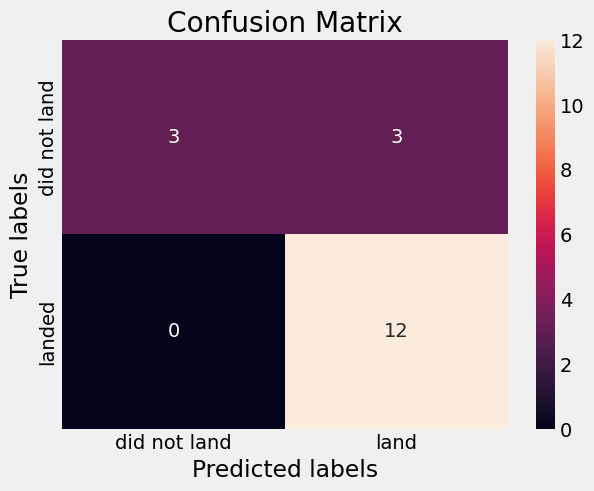

In [11]:
yhat = logreg_cv.predict(X_test)
lorgreg_cv_score = accuracy_score(Y_test,yhat)
print(f'Test Data Accuracy Score: {lorgreg_cv_score}') 

plot_confusion_matrix(Y_test,yhat)
plt.show()

#### **TASK 6:** Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [12]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm = SVC()

svm_cv = GridSearchCV(estimator=svm,param_grid=parameters,cv=10)
svm_cv.fit(X_train,Y_train)
print("Tuned Hyperparameters :(best parameters) ",svm_cv.best_params_)

print("Accuracy:",svm_cv.best_score_)


Tuned Hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


#### **Task 7:** Calculate the accuracy on the test data using the method score:

Test Data Accuracy Score: 0.8333333333333334


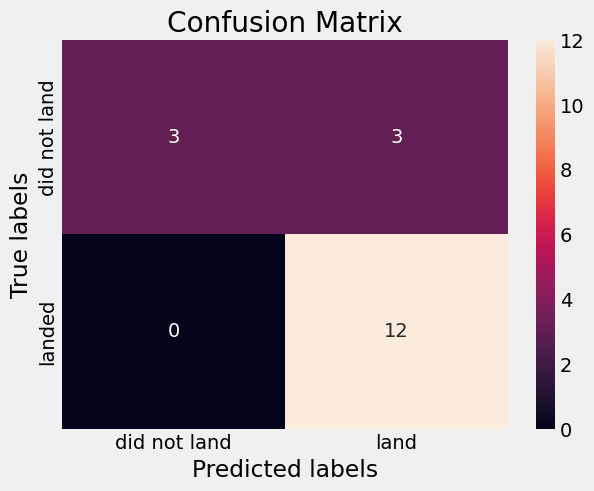

In [13]:
yhat = svm_cv.predict(X_test)
svm_cv_score = accuracy_score(Y_test,yhat)
print(f'Test Data Accuracy Score: {svm_cv_score}')

plot_confusion_matrix(Y_test,yhat)
plt.show() 

#### **TASK 8:** Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [14]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator=tree,param_grid=parameters,cv=10)
tree_cv.fit(X_train,Y_train)

print("Tuned Hyperparameters:(Best Parameters) ",tree_cv.best_params_)
print("Accuracy:",tree_cv.best_score_)


Tuned Hyperparameters:(Best Parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.9


#### **TASK 9:** Calculate the accuracy of tree_cv on the test data using the method score.

Test Data Accuracy Score:0.9444444444444444


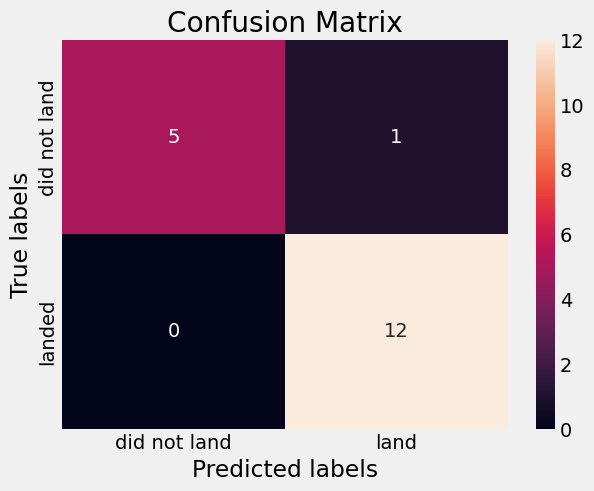

In [15]:
yhat = tree_cv.predict(X_test)
tree_cv_score = accuracy_score(Y_test,yhat)
print(f'Test Data Accuracy Score:{tree_cv_score}')

plot_confusion_matrix(Y_test,yhat)
plt.show() 


#### **Task 10:** Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [16]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=KNN,param_grid=parameters,cv=10)
knn_cv.fit(X_train,Y_train)

print("Tuned hyperparameters:(best parameters)",knn_cv.best_params_)
print("Accuracy:",knn_cv.best_score_)


Tuned hyperparameters:(best parameters) {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


#### **TASK 11:** Calculate the accuracy of knn_cv on the test data using the method score.

Test Data Accuracy Score:0.8333333333333334


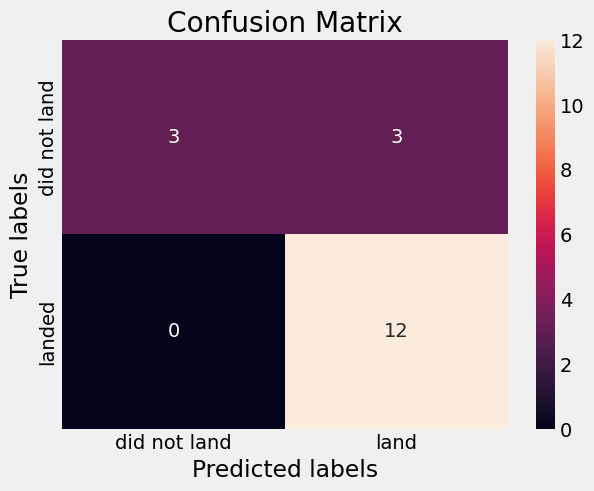

In [17]:
yhat= knn_cv.predict(X_test)
knn_cv_score = accuracy_score(Y_test,yhat)
print(f'Test Data Accuracy Score:{knn_cv_score}')
plot_confusion_matrix(Y_test,yhat)
plt.show() 

#### **Task 12:** Find the method that performs best

On average all models perform equally on the test data. The tree model's accuracy output varies, but on average the accuracy is equal to the other models at around 83%. 

#### Comparison of Different Model Classification Acccuracy 

    Model  Accuracy Score
0  LogReg            0.83
1     SVM            0.83
2    Tree            0.94
3     KNN            0.83


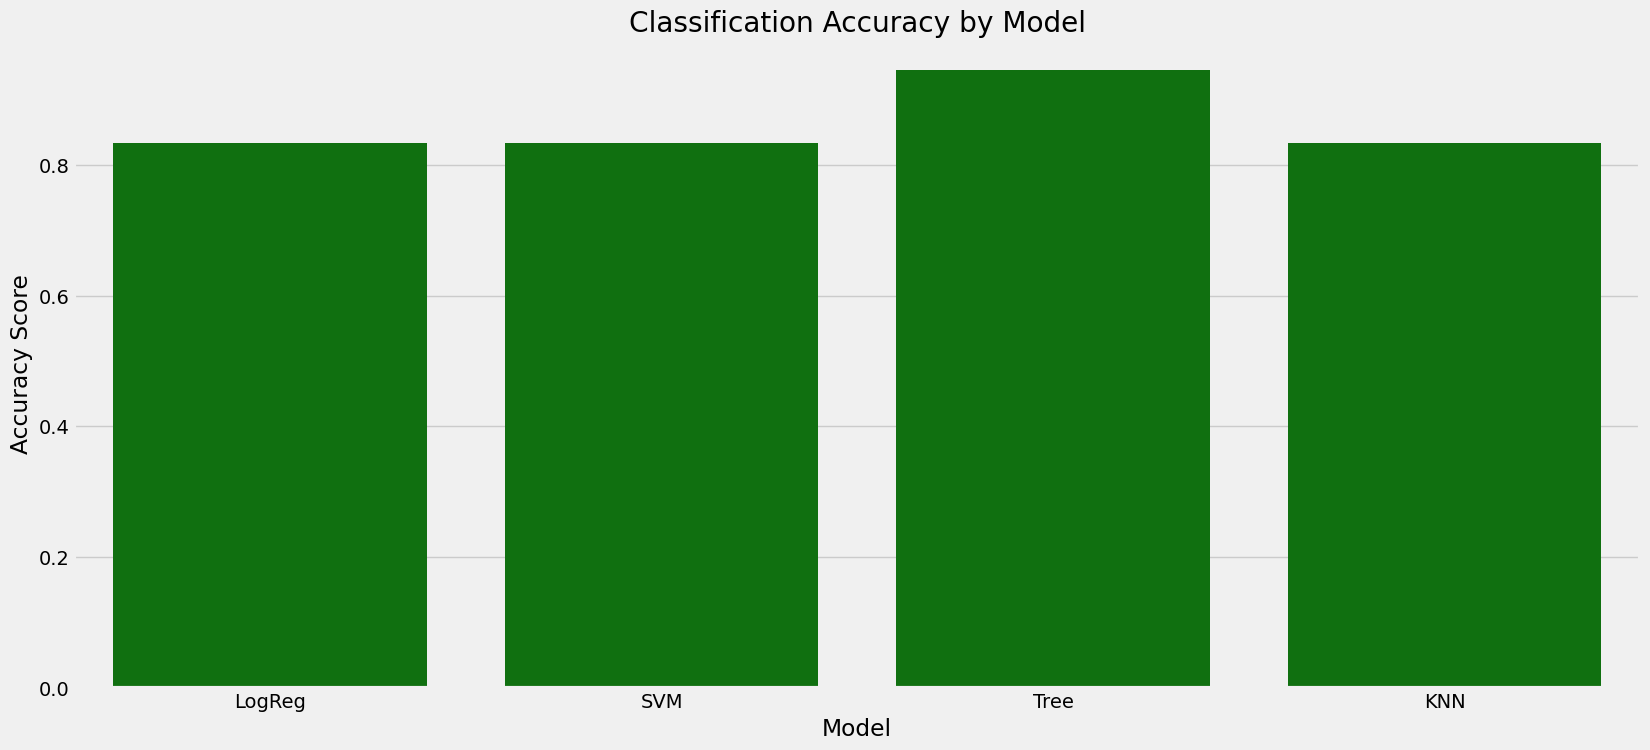

In [18]:
classification_accuracy = ({
    'Model':["LogReg","SVM","Tree","KNN"],
    'Accuracy Score':[lorgreg_cv_score,svm_cv_score,tree_cv_score,knn_cv_score],
     
})
tabular_df = pd.DataFrame(classification_accuracy)
print(tabular_df.round(2))


plt.figure(figsize=(18,8))
sns.barplot(data=tabular_df,x='Model',y='Accuracy Score',color='green')
plt.title('Classification Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

plt.show()



#### Comparison of Different Model Acccuracy Train Data

    Model  Best Score
0  LogReg        0.85
1     SVM        0.85
2    Tree        0.90
3     KNN        0.85


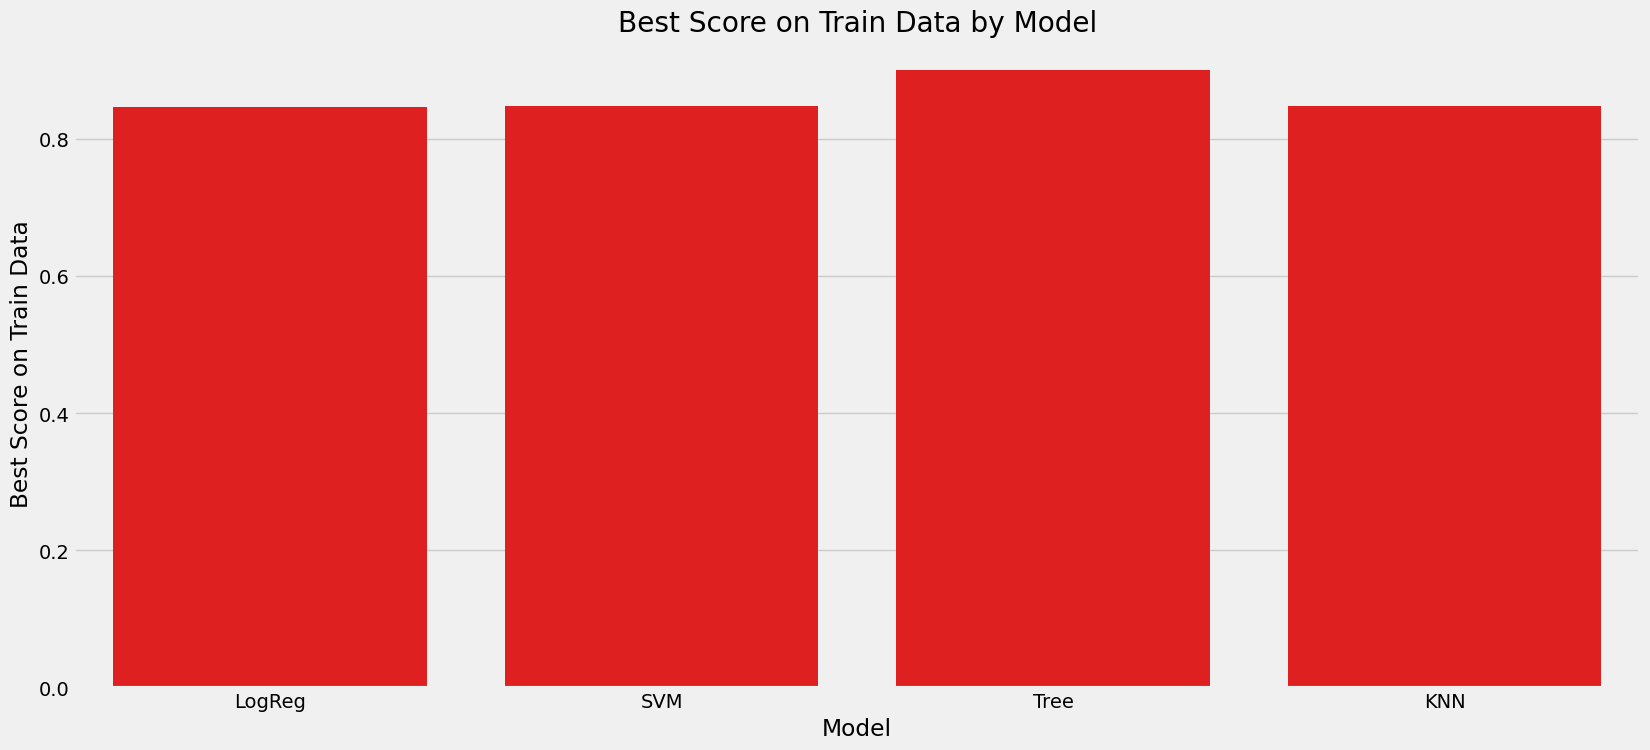

In [19]:
best_score = ({
    'Model':["LogReg","SVM","Tree","KNN"],
    'Best Score':[logreg_cv.best_score_,svm_cv.best_score_,tree_cv.best_score_,knn_cv.best_score_],
     
})
tabular_df = pd.DataFrame(best_score)
print(tabular_df.round(2))


plt.figure(figsize=(18,8))
sns.barplot(data=tabular_df,x='Model',y='Best Score',color='red')
plt.title('Best Score on Train Data by Model')
plt.xlabel('Model')
plt.ylabel('Best Score on Train Data')

plt.show()